In [1]:
import pandas as pd
import numpy as np
from graphviz import Digraph,Graph
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules
from mlxtend.preprocessing import TransactionEncoder
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', None)

<div class="jumbotron">
    <h1 class="display-1">关联分析</h1>
    <hr class="my-4">
    <p>主讲：李岩</p>
    <p>管理学院</p>
    <p>liyan@cumtb.edu.cn</p>
</div>

<center><img src="./img/association/blf1.jfif" width=50%></center>

<center><img src="./img/association/blf2.jfif" width=50%></center>

- 自动化选址

<center><img src="./img/association/blf5.jpg" width=100%></center>

- 自动化店铺设计

<center><img src="./img/association/blf4.jpg" width=100%></center>

- 门店的商品，依据上一周的销售数据，每周有7%-8%的品类会消失，换成新品

- 短保商品（保质期在48-72小时内的）采用动态定价

<center><img src="./img/association/blf6.jpg" width=100%></center>

-  每个便利蜂店的商品均依据周边人群消费偏好配货

<center><img src="./img/association/blf3.jfif" width=80%></center>

- 商品应当如何摆放？（顾客会同时购买哪些商品？）

给定**购物篮事务**（market basket transaction）

TID|项集
---|---
1|{面包，牛奶}
2|{面包，尿布，啤酒，鸡蛋}
3|{牛奶，尿布，啤酒，可乐}
4|{面包，牛奶，尿布，啤酒}
5|{面包，牛奶，尿布，可乐}

$$
\{啤酒\}\to\{尿布\}
$$

> 关联规则（association rule）

<dl class="row alert-info">
    <dt class="col-md-4">关联分析(association analysis)</dt>
    <dd class="auto">在大规模数据集中寻找数据之间有意义的关系（<strong>关联规则</strong>）的无监督的算法</dd>
</dl>

- 应用的领域
    + 零售中的产品组合、促销
    + 移动通信可选服务的绑定
    + 通过识别不寻常的保险索赔组合发现保险欺诈
    + 。。。

## 基本概念

- 令$I=\{i_1,i_2,\cdots,i_d\}$是购物篮中所有**项**的集合，$T=\{t_1,t_2,\cdots,t_N\}$是所有**事务**的集合

- 例如，$I=\{面包,牛奶,啤酒,尿布,鸡蛋,可乐\}$
- $T=\left\{\{面包,牛奶\},\{面包,尿布,啤酒\},\{鸡蛋,可乐\},\cdots\right\}$

### 项集（itemset）

<dl class="row alert-info">
    <dt class="col-md-3">项集</dt>
    <dd class="col-md-12">包含0个或多个项的集合</dd>
</dl>

<dl class="row alert-success">
    <dt class="col-md-3">$k$-项集</dt>
    <dd class="col-md-9">包含$k$个项的项集，$k=0,1,2,\cdots$</dd>
</dl>

> {啤酒，尿布，牛奶}是一个3-项集

<dl class="row alert-info">
    <dt class="col-md-3">空集</dt>
    <dd class="col-md-9">不包含任何项的项集</dd>
</dl>

<dl class="row alert-danger">
    <dt class="col-md-4">支持度计数</dt>
    <dd class="col-md-8">包含特定项集的<strong>事务</strong>的<strong>个数</strong></dd>
</dl>

<dl class="row alert-success">
    <dt class="col-md-3">支持度（support）</dt>
    <dd class="col-md-9">包含特定项集的<strong>事务</strong>在所有事务中的<strong>占比</strong>，取值范围$[0,1]$</dd>
</dl>

令$\sigma(X)$表示项集$X$的支持度计数，则，

$$
\sigma(X)=|\{t_i|X\subseteq t_i, t_i\in T\}|
$$

符号$|\cdot|$表示计算集合中元素的个数

TID|项集
---|---
1|{面包，牛奶}
2|{面包，尿布，啤酒，鸡蛋}
3|{牛奶，尿布，啤酒，可乐}
4|{面包，牛奶，尿布，啤酒}
5|{面包，牛奶，尿布，可乐}

- $\{尿布\}$的支持度计数是多少？

$$\sigma(\{尿布\})=4$$

- $\{啤酒, 尿布\}$的支持度计数是多少？

$$\sigma(\{啤酒,尿布\})=3$$

- $\{啤酒，尿布，牛奶\}$的支持度计数是多少？

$$\sigma(\{啤酒，尿布，牛奶\})=2$$

### 关联规则（association rule）

假设$X$和$Y$是两个项集，则**关联规则**是
- 形如$X\to Y$的表达式，其中$X\cap Y=\emptyset$

TID|项集
---|---
1|{面包，牛奶}
2|{面包，尿布，啤酒，鸡蛋}
3|{牛奶，尿布，啤酒，可乐}
4|{面包，牛奶，尿布，啤酒}
5|{面包，牛奶，尿布，可乐}

$$\{面包，尿布\}\to\{鸡蛋\}$$

$$\{面包\}\to\{牛奶，尿布\}$$

- 如何判断哪些是**有效**的关联规则？

> 需要根据关联规则的**强度**判断关联规则的有效性

In [3]:
arstr = Digraph(format='svg',
                node_attr={'fontname':'STKAITI'},
                graph_attr={'rankdir':'LR'})
arstr.node('A','关联规则强度',shape='plaintext')
arstr.node('B','支持度')
arstr.node('C','置信度')
arstr.edges(['AB','AC'])
arstr.render(filename='arstrength',directory='./img/association/')

'./img/association/arstrength.svg'

<img src="./img/association/arstrength.svg" width=100%>

#### 关联规则的支持度

- 关联规则的支持度衡量该关联规则包含的数据项集的频繁程度

令$s(X\to Y)$表示关联规则$X\to Y$的支持度，$N$为所有事务的总数，则

$$
s(X\to Y)=\frac{\sigma(X\cup Y)}{N}
$$

- 支持度用于去除偶然出现的关系

TID|项集
---|---
1|{面包，牛奶}
2|{面包，尿布，啤酒，鸡蛋}
3|{牛奶，尿布，啤酒，可乐}
4|{面包，牛奶，尿布，啤酒}
5|{面包，牛奶，尿布，可乐}

- 计算关联规则$\{面包，尿布\}\to\{鸡蛋\}$的支持度

$$
\begin{split}
s(\{面包，尿布\}\to\{鸡蛋\})&=\frac{\sigma(\{面包，尿布，鸡蛋\})}{N}\\
&=\frac{1}{5}
\end{split}
$$

- 计算关联规则$\{面包\}\to\{牛奶，尿布\}$的支持度

$$
\begin{split}
s(\{面包\}\to\{牛奶，尿布\})&=\frac{\sigma(\{面包,牛奶,尿布\})}{N}\\
&=\frac{2}{5}
\end{split}
$$

##### 支持度的不足

<center><img src="./img/association/supportShortN.png" width=100%></center>

- 对于关联规则$\{A,B\}\to\{C\}$而言，项集$\{A,B\}$出现了8次，但是只有3次与$\{C\}$同时

- 对于关联规则$\{B,E\}\to\{G\}$而言，项集$\{B,E\}$出现了3次，但是3次都与$\{G\}$同时

#### 关联规则的置信度

<dl class="row alert-success">
    <dt class="col-md-4">置信度（confidence）</dt>
    <dd class="col-md-8">衡量项集$Y$在包含项集$X$的事务中出现的频繁程度</dd>
</dl>

令$c(X\to Y)$表示关联规则$X\to Y$的置信度，则

$$
c(X\to Y)=\frac{\sigma(X\cup Y)}{\sigma(X)}
$$

取值范围$[0,1]$

- 置信度提升通过规则进行推理的可靠性

TID|项集
---|---
1|{面包，牛奶}
2|{面包，尿布，啤酒，鸡蛋}
3|{牛奶，尿布，啤酒，可乐}
4|{面包，牛奶，尿布，啤酒}
5|{面包，牛奶，尿布，可乐}

- 计算关联规则$\{面包，尿布\}\to\{鸡蛋\}$的置信度

$$
\begin{split}
c(\{面包，尿布\}\to\{鸡蛋\})&=\frac{\sigma(\{面包，尿布，鸡蛋\})}{\sigma(\{面包，尿布\})}\\
&=\frac{1}{3}
\end{split}
$$

- 计算关联规则$\{面包\}\to\{牛奶，尿布\}$的置信度

$$
\begin{split}
c(\{面包\}\to\{牛奶，尿布\})&=\frac{\sigma(\{面包,牛奶,尿布\})}{\sigma(\{面包\})}\\
&=\frac{2}{4}=\frac{1}{2}
\end{split}
$$

### 关联规则挖掘的问题表述

- 关联规则发现：给定事务集$T$，找出满足下列条件的所有规则
    + **支持度**$\ge minsup$
    + **置信度**$\ge minconf$

> 关联规则并不一定是**因果关系**，只是表明关联规则中涉及到的项集会**同时出现**

## 频繁项集

若数据集中包含的所有项的个数为$d$，那么

- 所有项集的个数为

$$
\sum_{k=0}^dC_d^k=2^d
$$

- 所有可能的关联规则的个数为

$$
\sum_{k=1}^{d-1}\left(C_d^k\times \sum_{j=1}^{d-k}C_{d-k}^j\right)=3^d-2^{d+1}+1
$$

- 例如，某超市出售1000种商品，那么可能的关联规则的数量是

In [6]:
pow(3,1000)-pow(2,1001)+1

1322070819480806636890455259752144365965422032752148167664920368226828597346704899540778313850608061963909777696872582355950954582100618911865342725257953674027620225198320803856584602085239494855421899136388581829900851581512422289186558405647065651991783728261512768091629891845145437466402431751173230506983987691809427140831266790438752347270094433242749727484630958415937995632602566797855058053311525307758583546709976985207992693374081496689754702826924329094491519081250

### 频繁项集

- 关联规则的支持度
$$
s(X\to Y)=\frac{\sigma(X\cup Y)}{N}
$$

> 关联规则的支持度仅依赖于项集**$X\cup Y$的支持度**

- 例如，$\{啤酒，尿布\}\to\{牛奶\}$，$\{啤酒，牛奶\}\to\{尿布\}$，$\{牛奶\}\to\{啤酒，尿布\}$都拥有相同的支持度

- 如果对应的项集$\{啤酒，尿布，牛奶\}$**不是**事务数据集中频繁出现的，就可以不考虑包含它的规则

<dl class="row alert-info">
    <dt class="col-md-6">频繁项集（frequent itemset）</dt>
    <dd class="col-md-6">满足最小支持度阈值的所有项集</dd>
</dl>

### 关联规则挖掘的基本策略

1. 生成频繁项集

2. 从频繁项集中提取所有高置信度的规则，即**强规则**（strong rule）

## 频繁项集的产生

### 格结构

<dl class="row alert-info">
    <dt class="col-md-7">格结构（lattice structure）</dt>
    <dd class="col-md-5">枚举所有可能的项集</dd>
</dl>

- 给定项的集合$I=\{A,B,C,D,E\}$，则该集合的格结构为

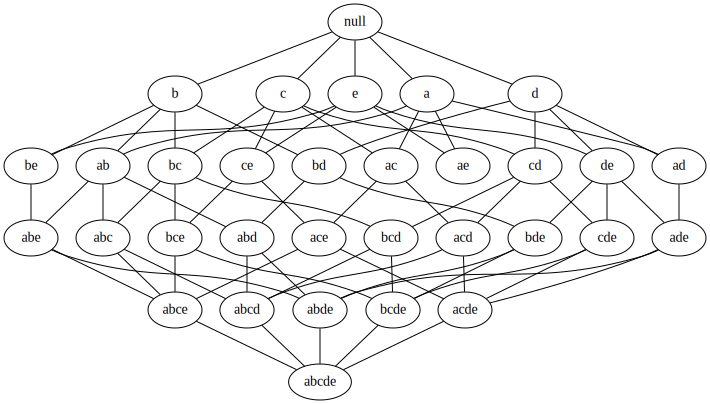

In [5]:
lattice = Graph(format='svg')
items = ['a','b','c','d','e']
lattice.attr(size='10,10')
lattice.node('A','null')
for i in items:
    lattice.edge('A',i)
secLayer = []
for i in items:
    tmp = items[items.index(i)+1:]
    for j in tmp:
        secLayer.append(i+j)
thrLayer = []
for i in items:
    tmp = items[items.index(i)+1:]
    for j in tmp:
        tmp1 = tmp[tmp.index(j)+1:]
        for k in tmp1:
            thrLayer.append(i+j+k)
fourLayer = []
for i in items:
    tmp = items[items.index(i)+1:]
    for j in tmp:
        tmp1 = tmp[tmp.index(j)+1:]
        for k in tmp1:
            tmp2 = tmp1[tmp1.index(k)+1:]
            for m in tmp2:
                fourLayer.append(i+j+k+m)
for i in items:
    for j in secLayer:
        if i in j:
            lattice.edge(i,j)
for i in secLayer:
    for j in thrLayer:
        if i in j:
            lattice.edge(i,j)
for i in thrLayer:
    for j in fourLayer:
        if all([i[l-1] in j for l in range(len(i))]):
            lattice.edge(i,j)
for i in fourLayer:
    lattice.edge(i,'abcde')
lattice

<center><img src="./img/association/lattice.png" width=80%></center>

##### 如何加快计算候选项集（candidate itemset）的支持度？

- 减少候选项集的数量

- 减少比较次数

### 先验原理（apriori）

<p class="h2 text-info"><strong>如果一个项集是频繁项集，则它的所有子集一定也是频繁项集。</strong></p>

![](./img/association/latticeFreq.png)

<p class="h2 text-info"><strong>如果项集是<u>非频繁</u>项集，则它的所有超集也一定是<u>非频繁</u>项集。</strong></p>

![](./img/association/latticePrun.png)

- 反单调性（anti-monotone）

$$
\forall X,Y:(X\subseteq Y)\Rightarrow s(X)\ge s(Y)
$$

### Apriori算法产生频繁项集

#### 示例

TID|事务
---|---
1|{面包，牛奶}
2|{面包，尿布，啤酒，鸡蛋}
3|{牛奶，尿布，啤酒，可乐}
4|{面包，牛奶，尿布，啤酒}
5|{面包，牛奶，尿布，可乐}

- 假设支持度阈值为**60%**，即最小支持度计数为**3**

1. 生成1-项集

项集|支持度计数
---|---
啤酒|3
面包|4
可乐|2
尿布|4
牛奶|4
鸡蛋|1

- $\{可乐\}$和$\{鸡蛋\}$可以删除

2. 生成2-项集

项集|支持度计数
---|---
啤酒|3
面包|4
尿布|4
牛奶|4

项集|支持度计数
---|---
{啤酒，面包}|2
{啤酒，尿布}|3
{啤酒，牛奶}|2
{面包，尿布}|3
{面包，牛奶}|3
{尿布，牛奶}|3

- $\{啤酒，面包\}$和$\{啤酒，牛奶\}$可以删除

3. 生成3-项集

项集|支持度计数
---|---
{啤酒,尿布}|3
{面包,尿布}|3
{面包,牛奶}|3
{尿布,牛奶}|3

项集|支持度计数
---|---
{面包，尿布，牛奶}|2

- $\{啤酒,尿布,面包\}$舍去，由于$\{啤酒,面包\}$是非频繁项集
- $\{啤酒,尿布,牛奶\}$舍去，由于$\{啤酒,牛奶\}$是非频繁项集

<p class="h2 text-info"><strong>Apriori算法产生频繁项集的核心：</strong></p>

1. 从频繁$(k-1)$-项集，生成候选$k$-项集

2. 计算候选$k$-项集的支持度计数，删除支持度计数$\lt minsup\times N$的候选项集

#### 关联规则产生

##### 关联规则的提取

> 将项集$Y$划分成两个非空的子集$X$和$Y-X$，使得$X\to Y-X$满足置信度阈值

- 假设$\{A,B,C\}$是频繁项集，则由该项集可以产生的关联规则有：

$$
\{A,B\}\to\{C\},\quad \{A,C\}\to\{B\},\quad \{B,C\}\to\{A\},\quad \{A\}\to\{B,C\},
\quad \{B\}\to\{A,C\},\quad \{C\}\to\{A,B\}
$$

##### 基于置信度的剪枝

> 如果规则$X\to Y-X$**不满足**置信度阈值，则形如$X'\to Y-X'$的规则一定也**不满足**置信度阈值，其中$X'\subset X$

- 假设$\{A,B,C,D\}$是一个频繁4-项集，则

$$
c(\{A,B,C\}\to\{D\})\ge c(\{A,B\}\to\{C,D\})\ge c(\{A\}\to\{B,C,D\})
$$

$$
\begin{split}
c(\{A,B,C\}\to\{D\})&=\frac{\sigma(\{A,B,C,D\})}{\sigma(\{A,B,C\})}\\
c(\{A,B\}\to\{C,D\})&=\frac{\sigma(\{A,B,C,D\})}{\sigma(\{A,B\})}\\
c(\{A\}\to\{B,C,D\})&=\frac{\sigma(\{A,B,C,D\})}{\sigma(\{A\})}
\end{split}
$$

由于$\sigma(\{A,B,C\})\le\sigma(\{A,B\})\le\sigma(\{A\})$

- 同一频繁集中产生的关联规则的置信度具有**反单调**性质：

<p class="h2 alert-info">随着关联规则<strong>右侧项</strong>的数目<mark>增加</mark>，关联规则的置信度<mark>降低</mark></p>

![](./img/association/confidence.png)

### FP-growth算法

- Apiori算法的不足:
    + 每次计算生成的$k-$项集的支持度，都需要重新读取事务数据集，导致效率低，运算时间长

<dl class="row alert-info">
    <dt class="col-md-4">FP增长算法</dt>
    <dd class="col-md-8">将频繁项集按照支持度降序压缩存储在FP-tree(frequent pattern)中，并从FP-tree中生成关联规则</dd>
</dl>

- FP增长算法的优势：
    + 逐个读入事务，并把事务映射到FP树的一条路径
    + 由于不同的事务可能具有若干相同的项，这些事务在FP树中的路径可能重叠
    + 如果FP树足够小，可以存放在内存中，运算速度加快

#### FP树构造示例

<center><img src="./img/association/fpTree.Gif" width=100%></center>

1. **第一次**读取事务数据集，确定每个**项**的支持度计数。舍去非频繁项，将频繁项按照支持度降序排序。上图中频繁项降序排列为$a,b,c,d,e$

2. **第二次**读取事务数据集，构建FP树。读入第一个事务$\{a,b\}$，创建标记为$a$和$b$的节点，形成$null\to a\to b$路径。在每个节点上计数，表示映射到该路径上的事务的个数

3. 读入第二个事务$\{b,c,d\}$，形成代表该事务的路径$null\to b\to c\to d$，该路径上每个节点的计数为1。尽管前2个事务具有共同的项$b$，但是由于他们没有共同的前缀，所以两条路径不相交

4. 读入第三个事务$\{a,c,d,e\}$，由于该事务与第一个事务$\{a,b\}$具有共同的前缀$a$，因此该事务的路径与第一个事务的路径部分重叠。此时，$a$节点的计数为2，而在第三个事务路径上的节点$c,d,e$的计数为1

5. 继续上述过程，直到每个事务都映射成为FP树的一条路径

#### 产生频繁项集

<p class="h2 alert-info">FP增长算法采用<strong>自底向上</strong>方式探索FP树，生成频繁项集</p>

<center><img src="./img/association/fpTreeFull.Gif" width=100%></center>

- 首先查找以$e$结尾的频繁项集，然后依次查找$d,c,b,a$

- 因为每个事务都映射到FP树的一条路径，因此，仅考察包含特点节点（例如$e$）的路径，就能够发现以$e$结尾的频繁项集

## 关联规则的评估

- 在提取出来的众多的规则中，要寻找令人感**兴趣**的关联规则

### 评价关联规则的质量标准

1. 客观兴趣度度量:
    - 利用统计量估计挖掘出来的关联规则是否有兴趣

2. 根据主观论据判别
    - 利用领域的相关知识来评价哪些关联规则是有趣的

### 客观兴趣度度量

#### 支持度-置信度框架的局限

##### 咖啡与茶的例子

$\quad$|{咖啡}|不包含{咖啡}|边际||
---|---|---|---|---
{茶}|150|50|200|**{茶}支持度计数**
不包含{茶}|650|150|800|
边际|800|200|1000|
|**{咖啡}支持度计数**|||

- 评估$\{茶\}\to\{咖啡\}$关联规则
    + 支持度：$s(\{茶\}\to\{咖啡\})=\frac{\sigma(\{茶\}\cup\{咖啡\})}{N}=\frac{150}{1000}=15\%$
    + 置信度：$c(\{茶\}\to\{咖啡\})=\frac{\sigma(\{茶\}\cup\{咖啡\})}{\sigma(\{茶\})}=\frac{150}{200}=75\%$

- 喝咖啡的消费者占的比例为$\frac{800}{1000}=80\%$

- 喝茶的消费者中又喝咖啡的占的比例为$75\%$

- 结果与提取的关联规则产生了矛盾
    + 没有该关联规则的情况下，一个消费者有<mark>$80\%$</mark>的概率会喝咖啡
    + 如果知道一个人喝茶，那么这个人喝咖啡的概率则降低到<mark>$75\%$</mark>

##### 应该提取什么样的关联规则？

- 置信度高的规则，$c(X\to Y)$大
    + 购买$X$的时候也会更加可能买$Y$

- $c(X\to Y)\gt s(Y)$的规则
    + 否则，提取的关联规则会导致相反的结果：购买$X$实际上会降低购买$Y$的概率

- 在支持度、置信度之外，还需要指标能够衡量$X$和$Y$之间的**相关性**

#### 提升度（lift）

- 给定关联规则$X\to Y$，其提升度为，
$$
\text{lift}(X\to Y)=\frac{c(X\to Y)}{s(Y)}
$$
取值范围$[0,\infty]$

- 衡量了$X$的出现对$Y$的出现的概率有多大程度的改变，也即该规则与偶然性相比有多少改善

- 如果$X$和$Y$相互独立，$\text{lift}(X\to Y)=1$

#### 杠杆率（leverage）

- 给定关联规则$X\to Y$，其杠杆率为，
$$
\text{leverage}(X\to Y)=s(X\to Y)-s(X)\times s(Y)
$$
取值范围$[-1,1]$

- 衡量了关联规则的后项集和前项集直接的紧密程度，**$X$和$Y$的关系越紧密，杠杆率越大**

- 如果$X$和$Y$相互独立，$\text{leverage}(X\to Y)=0$

#### 确信度（conviction）

- 给定关联规则$X\to Y$，其确信度为，
$$
\text{conviction}(X\to Y)=\frac{1-s(Y)}{1-c(X\to Y)}
$$
取值范围$[0,\infty)$

- 衡量了关联规则后项集对前项集的依赖程度，**依赖程度越大，确信度越高**

- 如果$X$和$Y$相互独立，$\text{conviction}(X\to Y)=1$

## Python实现

- Mlxtend (machine learning extensions) 是`python`机器学习的一个扩展包

- [http://rasbt.github.io/mlxtend/](http://rasbt.github.io/mlxtend/)

- `Windows`系统：`pip install -U mlxtend`
- `Mac`系统：`pip3 install -U mlxtend`

### 生成频繁集

#### apriori算法

```python
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.5, use_colnames=False, max_len=None)
```
- `df`：`pandas`的`dataframe`类型，经过`one-hot`编码
- `min_support`：`float`类型，取值[0,1]，支持度阈值
- `use_colnames`：`bool`类型，返回的频繁项集是否用原有的列名，`False`用列的位置
- `max_len`：生成项集的最大数量，默认生成所有项集
- 返回值：由项集构成的`dataframe`，列包括`["support", "itemsets"]`

In [7]:
bskt = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]
tp = [','.join(each) for each in bskt]
pd.DataFrame(tp,columns=['事务'])

,事务
0,"Milk,Onion,Nutmeg,Kidney Beans,Eggs,Yogurt"
1,"Dill,Onion,Nutmeg,Kidney Beans,Eggs,Yogurt"
2,"Milk,Apple,Kidney Beans,Eggs"
3,"Milk,Unicorn,Corn,Kidney Beans,Yogurt"
4,"Corn,Onion,Onion,Kidney Beans,Ice cream,Eggs"


##### 转换事务数据集表达形式

```python
from mlxtend.preprocessing import TransactionEncoder
TransactionEncoder()
```
- 建立`one-hot`编码模型
- 对事务数据集进行`one-hot`编码

```python
te = TransactionEncoder()
te.fit_transform(X)
```
- 利用建立的`one-hot`编码模型对原始事务数据集$X$进行编码转换，$X$是一个**`list of lists`**
- 返回值：编码过后的`Numpy`数组，形状为`[n_transactions, n_unique_items]`，值为`True`或`False`

- `te.columns_`：经过`one-hot`编码后数组的列名，即所有独特项的名称

In [9]:
te = TransactionEncoder()

In [10]:
bsktOH = te.fit_transform(bskt)
bsktOH
bsktdf = pd.DataFrame(bsktOH,columns=te.columns_)
bsktdf

array([[False, False, False,  True, False,  True,  True,  True,  True,
        False,  True],
       [False, False,  True,  True, False,  True, False,  True,  True,
        False,  True],
       [ True, False, False,  True, False,  True,  True, False, False,
        False, False],
       [False,  True, False, False, False,  True,  True, False, False,
         True,  True],
       [False,  True, False,  True,  True,  True, False, False,  True,
        False, False]])

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


##### apriori算法提取频繁项集

In [11]:
itemsets = apriori(bsktdf,min_support=0.6,use_colnames=True)
itemsets

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Kidney Beans, Milk)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Yogurt, Kidney Beans)"


#### FP增长树算法

```python
from mlxtend.frequent_patterns import fpgrowth
fpgrowth(df, min_support=0.5, use_colnames=False, max_len=None)
```
- `df`：`pandas`的`DataFrame`，经过`one-hot`编码后的数据集
- `min_support`：支持度阈值
- `use_colnames`：返回的频繁项集是否用原有的列名
- `max_len`：生成项集的最大数量，默认生成所有项集

In [12]:
itemsetsFp = fpgrowth(bsktdf,min_support=0.6,use_colnames=True)
itemsetsFp

,support,itemsets
0,1.0,(Kidney Beans)
1,0.8,(Eggs)
2,0.6,(Yogurt)
3,0.6,(Onion)
4,0.6,(Milk)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Yogurt, Kidney Beans)"
7,0.6,"(Eggs, Onion)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Eggs, Onion, Kidney Beans)"


### 提取关联规则

```python
from mlxtend.frequent_patterns import association_rules
association_rules(df, metric='confidence', min_threshold=0.8)
```
- `df`：生成的频繁项集
- `metric`：`str`类型，可以是`support, confidence, lift`
- `min_threshold`：`float`类型，设定所选顶`metric`的阈值

In [13]:
minedRules = association_rules(itemsets)
minedRules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.0,1.00,0.00,inf
1,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.8,1.00,0.00,1.0
2,(Onion),(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
3,(Milk),(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
4,(Onion),(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
5,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
6,"(Eggs, Onion)",(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
7,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
8,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.0,1.25,0.12,inf


##### 筛选出提升度大于1的规则

In [14]:
minedRules.loc[minedRules['lift']>1,:]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Onion),(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
7,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
8,(Onion),"(Eggs, Kidney Beans)",0.6,0.8,0.6,1.0,1.25,0.12,inf


## 零售店关联规则挖掘

### 读取数据

In [15]:
groceryDf = pd.read_csv('./data/association/groceriesR.csv')
groceryDf.head()

ParserError: Error tokenizing data. C error: Expected 4 fields in line 6, saw 5


- 出错原因：原始数据每行的元素数量不一致

- 解决方法：用`python`自带的`open`和`readlines`函数

In [16]:
grocery = []
with open('./data/association/groceriesR.csv','r') as f:
    for each in f.readlines():
        grocery.append(each.strip('\n').split(','))
grocery

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

### 数据预处理

##### `one-hot`编码

In [17]:
gte = TransactionEncoder()
groceryOH = gte.fit_transform(grocery)
groceryOH.shape

(9835, 169)

In [18]:
groceryDfOH = pd.DataFrame(groceryOH,columns=gte.columns_)
groceryDfOH.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


### 生成频繁项集

In [19]:
gItemSets = apriori(groceryDfOH,min_support=0.005,use_colnames=True)

In [20]:
gItemSets

,support,itemsets
0,0.008033,(Instant food products)
1,0.033452,(UHT-milk)
2,0.017692,(baking powder)
3,0.052466,(beef)
4,0.033249,(berries)
5,0.026029,(beverages)
6,0.080529,(bottled beer)
7,0.110524,(bottled water)
8,0.064870,(brown bread)
9,0.055414,(butter)


### 提取关联规则

In [23]:
gRules = association_rules(gItemSets,metric='confidence', min_threshold=0.3)
gRules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(baking powder),(other vegetables),0.017692,0.193493,0.007321,0.413793,2.138547,0.003898,1.375807
1,(baking powder),(whole milk),0.017692,0.255516,0.009253,0.522989,2.046793,0.004732,1.560725
2,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416
3,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
4,(beef),(whole milk),0.052466,0.255516,0.021251,0.405039,1.585180,0.007845,1.251315
5,(berries),(other vegetables),0.033249,0.193493,0.010269,0.308869,1.596280,0.003836,1.166938
6,(berries),(whole milk),0.033249,0.255516,0.011795,0.354740,1.388328,0.003299,1.153774
7,(berries),(yogurt),0.033249,0.139502,0.010574,0.318043,2.279848,0.005936,1.261807
8,(bottled water),(whole milk),0.110524,0.255516,0.034367,0.310948,1.216940,0.006126,1.080446
9,(brown bread),(whole milk),0.064870,0.255516,0.025216,0.388715,1.521293,0.008641,1.217899


In [24]:
gRules.loc[gRules['lift']>2,:]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(baking powder),(other vegetables),0.017692,0.193493,0.007321,0.413793,2.138547,0.003898,1.375807
1,(baking powder),(whole milk),0.017692,0.255516,0.009253,0.522989,2.046793,0.004732,1.560725
3,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
7,(berries),(yogurt),0.033249,0.139502,0.010574,0.318043,2.279848,0.005936,1.261807
14,(butter milk),(yogurt),0.027961,0.139502,0.008541,0.305455,2.189610,0.004640,1.238937
18,(chicken),(other vegetables),0.042908,0.193493,0.017895,0.417062,2.155439,0.009593,1.383521
26,(cream cheese ),(yogurt),0.039654,0.139502,0.012405,0.312821,2.242412,0.006873,1.252218
29,(curd),(yogurt),0.053279,0.139502,0.017285,0.324427,2.325615,0.009853,1.273732
46,(grapes),(other vegetables),0.022369,0.193493,0.009049,0.404545,2.090754,0.004721,1.354440
50,(hamburger meat),(other vegetables),0.033249,0.193493,0.013828,0.415902,2.149447,0.007395,1.380774


## 关联规则的分类

<p class="h2 alert-info">关联规则应当具有<strong>透明度</strong>和<strong>可用性</strong></p>

- 以下关联规则，哪个更好？
    1. 在沃尔玛购买芭比娃娃的客户有60%的可能也购买一种糖果
    2. 签购维修保养协议的客户很有可能购买大型家用电器
    3. 当一个新的五金店开张时，最常卖的是抽水马桶清洁器

- 关联规则的三种类型
    + 可操作的规则
    + 平凡的规则
    + 费解的规则

### 可操作的规则

<dl class="row alert-info">
    <dt class="col-md-4">可操作的规则</dt>
    <dd class="col-md-8">包含高质量，可操作的信息</dd>
<dl>

- 例如：
    + 在沃尔玛购买芭比娃娃的客户有60%的可能也购买一种糖果
    + 购买啤酒的同时购买尿布

- 一旦被识别，规则容易理解

- 规则可以为产品布局、产品促销提供依据

### 平凡的规则

<dl class="row alert-info">
    <dt class="col-md-4">平凡的规则</dt>
    <dd class="col-md-8">该规则早已是相应领域的常识</dd>
<dl>

- 例如：
    + 签购维修保养协议的客户很有可能购买大型家用电器
    + 购买黄油的同时购买面包
    + 买油漆的客户也购买油漆刷

- 需要注意：平凡的规则可能仅仅检验了上次营销活动的效果
    + 例如，在上次营销活动种捆绑促销牛奶和大米

- 逆向应用平凡规则：当规则应当100%出现的时候，并没有出现，可能反映出数据收集或者经营过程中出现了问题

### 费解的规则

<dl class="row alert-info">
    <dt class="col-md-4">费解的规则</dt>
    <dd class="col-md-8">该规则似乎无法解释，也不具备操作建议</dd>
<dl>

- 例如：
    + 当一个新的五金店开张时，最常卖的是抽水马桶清洁器

- 可能由于一些特定原因导致关联规则的出现，但是这种规则不具备广泛的意义